# What is the Most affordable and Safest area for families in NY

This report is aimed at helping families dictate what neighborhoods in NY might be the best for raising a family while working in NY.  This could also be useful for companies looking to hire new employees as a way to assure them there are neighborhoods in the area which might make the move desireable and still ensure them a prosperous future.

This report will utilize 2 datasets as well as a relationship between locations.  The first taking into account neighborhoods with lower crime rates.  This dataset is entitle NYC_crime.csv (https://data.cityofnewyork.us/Public-Safety/NYC-crime/qb7u-rbmr) and will be loaded and explored first.  The second will look at the average cost of homes in the area, which is useful when comparing future salary to living expenses.  These are very basic metrics, but should allow individuals to gain a basic understanding of what a job in NY may entail.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys as sys

### Load the Crime dataset

In [2]:
crm_csv = 'NYC_crime.csv'
crm_df = pd.read_csv(crm_csv, index_col = 0)
crm_df.head()

,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
CMPLNT_NUM,,,,,,,,,,,,,,,,,,,,,
872986408,01/01/2016,00:01:00,12/31/2017,23:59:00,03/05/2018,233,SEX CRIMES,170,"SEXUAL MISCONDUCT,INTERCOURSE",ATTEMPTED,...,33,INSIDE,RESIDENCE - PUBLIC HOUSING,NaN,NaN,1001936,245282,40.839908,-73.936084,"(40.839908201, -73.936083587)"
911003056,01/01/2016,12:00:00,02/16/2018,12:00:00,02/28/2018,109,GRAND LARCENY,407,"LARCENY,GRAND BY DISHONEST EMP",COMPLETED,...,20,INSIDE,OTHER,NaN,NaN,989731,222727,40.778017,-73.980211,"(40.778016975, -73.980211324)"
178447094,01/01/2016,08:00:00,03/18/2017,17:00:00,02/21/2018,109,GRAND LARCENY,420,"LARCENY,GRAND BY OPEN/COMPROMISE CELL PHONE ACCT",COMPLETED,...,34,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,1001606,251324,40.856492,-73.937261,"(40.856492363, -73.93726058)"
713483285,01/01/2016,00:00:00,02/15/2018,19:30:00,02/16/2018,112,THEFT-FRAUD,739,"FRAUD,UNCLASSIFIED-FELONY",COMPLETED,...,32,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,1001374,238163,40.820370,-73.938133,"(40.820369696, -73.938132846)"
908438691,01/01/2016,10:00:00,02/11/2018,16:00:00,02/11/2018,578,HARRASSMENT 2,638,"HARASSMENT,SUBD 3,4,5",COMPLETED,...,24,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,993373,229301,40.796058,-73.967052,"(40.79605784, -73.967052307)"


##### Rename columns and remove unnecessary columns

In [3]:
colNames = crm_df.columns
colNames

Index(['CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM',
       'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD', 'PD_DESC', 'CRM_ATPT_CPTD_CD',
       'LAW_CAT_CD', 'JURIS_DESC', 'BORO_NM', 'ADDR_PCT_CD',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'PARKS_NM', 'HADEVELOPT',
       'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'Lat_Lon'],
      dtype='object')

In [4]:
#wanted col names are OFNS_DESC, and Latitude, Longitude, Lat_Lon
#These numbers are
offense = crm_df.columns.get_loc('OFNS_DESC')
lat = crm_df.columns.get_loc('Latitude')
long = crm_df.columns.get_loc('Longitude')
latLong = crm_df.columns.get_loc('Lat_Lon')
print([offense, lat, long, latLong])

[6, 20, 21, 22]


In [5]:
rge = list(range(0,5))
rge2 = list(range(7,19))
rge = rge + rge2
crm_df = crm_df.drop(columns=['CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM',
       'RPT_DT', 'KY_CD', 'PD_CD', 'PD_DESC', 'CRM_ATPT_CPTD_CD',
       'LAW_CAT_CD', 'JURIS_DESC', 'BORO_NM', 'ADDR_PCT_CD',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'PARKS_NM', 'HADEVELOPT',
       'X_COORD_CD', 'Y_COORD_CD'])
crm_df.head()

,OFNS_DESC,Latitude,Longitude,Lat_Lon
CMPLNT_NUM,,,,
872986408,SEX CRIMES,40.839908,-73.936084,"(40.839908201, -73.936083587)"
911003056,GRAND LARCENY,40.778017,-73.980211,"(40.778016975, -73.980211324)"
178447094,GRAND LARCENY,40.856492,-73.937261,"(40.856492363, -73.93726058)"
713483285,THEFT-FRAUD,40.820370,-73.938133,"(40.820369696, -73.938132846)"
908438691,HARRASSMENT 2,40.796058,-73.967052,"(40.79605784, -73.967052307)"


### Load Housing Cost Dataset

In [6]:
house_csv = 'DOF__Summary_of_Neighborhood_Sales_Citywide_for_Class_1-__2-_and_3-Family_homes_-_2009.csv'
house_df = pd.read_csv(house_csv)
house_df.head()

,BOROUGH,BUILDING CLASS CATEGORY,NUMBER OF SALES,MINIMUM SALE PRICE,AVERAGE SALE PRICE,MEDIAN SALE PRICE,MAXIMUM SALE PRICE
0,1,01 ONE FAMILY HOMES,55,408771.0,6812888.0,5075000.0,25000000.0
1,1,02 TWO FAMILY HOMES,47,320000.0,3736718.0,3085000.0,15400000.0
2,1,03 THREE FAMILY HOMES,33,449249.0,2857128.0,1100000.0,19500000.0
3,2,01 ONE FAMILY HOMES,516,150000.0,405594.0,349995.0,5000000.0
4,2,02 TWO FAMILY HOMES,771,150000.0,421473.0,428786.0,1000000.0


In [7]:
house_df.columns

Index(['BOROUGH', 'BUILDING CLASS CATEGORY', ' NUMBER OF SALES ',
       ' MINIMUM SALE PRICE ', ' AVERAGE SALE PRICE ', ' MEDIAN SALE PRICE ',
       ' MAXIMUM SALE PRICE '],
      dtype='object')

In [8]:
house_df = house_df.drop(['BUILDING CLASS CATEGORY',' NUMBER OF SALES ',' MINIMUM SALE PRICE ', ' MEDIAN SALE PRICE ',' MAXIMUM SALE PRICE '], axis = 1)
house_df.head()

,BOROUGH,AVERAGE SALE PRICE
0,1,6812888.0
1,1,3736718.0
2,1,2857128.0
3,2,405594.0
4,2,421473.0


In [9]:
house_meanDF = house_df.groupby('BOROUGH').mean()
house_meanDF = house_meanDF.reset_index()

In [10]:
#Borough numbers are as follow
#1 Manhattan {40.7831, 73.9712}
#2 Brooklyn.{40.6782, 73.9442}
#3 Queens. {40.7282, 73.7949}
#4 The Bronx. {40.8448, 73.8648}
#5 Staten Island. {40.5795, 74.1502}
house_meanDF.BOROUGH = house_meanDF.BOROUGH.astype(object)
house_meanDF.dtypes

BOROUGH                  object
 AVERAGE SALE PRICE     float64
dtype: object

In [11]:
lat_str = np.array([40.7831,40.6782,40.7282,40.8448,40.5795])
lon_str = np.array([73.9712,73.9442,73.7949,73.8648,74.1502])
bor_str = np.array([1,2,3,4,5])
d = {'BOROUGH': bor_str, 'BOR_LAT': lon_str,'BOR_LONG': lon_str}
bor_df = pd.DataFrame(data=d)

bor_df.BOROUGH = bor_df.BOROUGH.astype(object)
bor_df.dtypes

BOROUGH      object
BOR_LAT     float64
BOR_LONG    float64
dtype: object

In [12]:
result = house_meanDF.join(bor_df, lsuffix='BOROUGH', rsuffix='BOROUGH')
result

,BOROUGHBOROUGH,AVERAGE SALE PRICE,BOROUGHBOROUGH,BOR_LAT,BOR_LONG
0,1,4.468911e+06,1,73.9712,73.9712
1,2,4.347190e+05,2,73.9442,73.9442
2,3,5.966653e+05,3,73.7949,73.7949
3,4,5.311523e+05,4,73.8648,73.8648
4,5,4.018787e+05,5,74.1502,74.1502
5,Citywide,5.592527e+05,NaN,NaN,NaN


In [13]:
result = result.rename(columns={"BOROUGHBOROUGH": "BOROUGH"})


In [14]:
result.drop(5)
result.head()

,BOROUGH,AVERAGE SALE PRICE,BOROUGH,BOR_LAT,BOR_LONG
0,1,4.468911e+06,1,73.9712,73.9712
1,2,4.347190e+05,2,73.9442,73.9442
2,3,5.966653e+05,3,73.7949,73.7949
3,4,5.311523e+05,4,73.8648,73.8648
4,5,4.018787e+05,5,74.1502,74.1502


### Find what borough's the crime data occured in

This step will require a KNN classifier to label the crime data into boroughs.  Once labeled, the data will be counted to show total number of crimes per borough.  Next a model will be implemented scoring cost of living as an inverse slope, indicating a lower value would be a higher family happiness score, and the same for crime.  

The ideal location would have a mix of manageable affordability, as well as low crime.  This would likely be the intersection point of the slopes.

In [29]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import math
%matplotlib inline

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
crime_latlong = pd.DataFrame(crm_df[['Latitude','Longitude']])
crime_latlong = crime_latlong.reset_index()
crime_latlong = crime_latlong.drop(columns='CMPLNT_NUM')
crime_latlong.head()

,Latitude,Longitude
0,40.839908,-73.936084
1,40.778017,-73.980211
2,40.856492,-73.937261
3,40.820370,-73.938133
4,40.796058,-73.967052


### Find nearest borough for crime

In [105]:
x2 = bor_df.BOR_LAT
y2 = bor_df.BOR_LONG
borough = []
x1 = crime_latlong.Latitude[1]
for i in range(0,len(crime_latlong.Latitude)):
    x1 = np.repeat(crime_latlong.Latitude[i],len(x2))
    y1 = np.repeat(crime_latlong.Latitude[i],len(y2))
    skwar = (x2-x1)**2+(y2-y1)**2
    bor_dist = skwar.apply(math.sqrt)
    dist_min = bor_dist[bor_dist==min(bor_dist)]
    bor_choice = dist_min.index[0]
    borough.append(bor_choice)
print(borough)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


Hilariously this shows every single crime from the list to be closest in proximity to Brooklyn, and I believe the outcome is actually accurate as I have printed out the distance between lat/long coordinates and every single option is in fact found at the minimum with index #2, which is Brooklyn.  This could indicate that many crimes on the border of different boroughs may occur, but that all crimes are closest to the Brooklyn center.

Therefore, a simple solution would be to eliminate Brooklyn from the list of valid options to raise a family, solely based on crime rates.

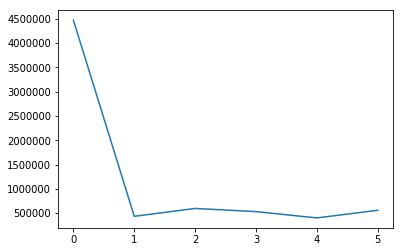

In [109]:
plt.plot(result[' AVERAGE SALE PRICE '])

In [110]:
result

,BOROUGH,AVERAGE SALE PRICE,BOROUGH,BOR_LAT,BOR_LONG
0,1,4.468911e+06,1,73.9712,73.9712
1,2,4.347190e+05,2,73.9442,73.9442
2,3,5.966653e+05,3,73.7949,73.7949
3,4,5.311523e+05,4,73.8648,73.8648
4,5,4.018787e+05,5,74.1502,74.1502
5,Citywide,5.592527e+05,NaN,NaN,NaN


The above plot shows Manhattan's average home cost to be the highest of all 5 boroughs.  However, it show's both borough #1 and #4 to have the lowest average home cost.  These borough's are Brooklyn and Staten Island.  

Since Brooklyn was taken off the list due to high crime, we must settle on Staten Island being the best choice to raise a family and work in NY based off the para